In [1]:
#importando os pacotes para baixar os dados e buscar as funções necessárias
import quandl as qdl
from arch import arch_model
#Importando bibliotecas matemáticas e de ciência de dados
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl

In [2]:
#Pré determinando a configuração dos gráficos
sns.set()

mpl.rcParams['figure.figsize'] = (15, 5)

In [3]:
#Definição e Visualização os dados
dolar = qdl.get('BCB/1', start_date = '2000-01-01')
dolar

,Value
Date,
2000-01-03,1.8011
2000-01-04,1.8337
2000-01-05,1.8544
2000-01-06,1.8461
2000-01-07,1.8281
...,...
2020-08-06,5.3431
2020-08-07,5.4227
2020-08-10,5.3933


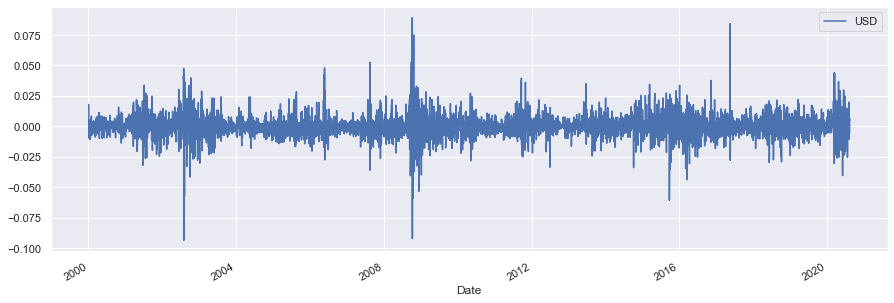

In [5]:
#Visualização do gráfico dos retornos
dolar_ret = np.log(dolar/dolar.shift(1)).dropna()
dolar_ret.plot()

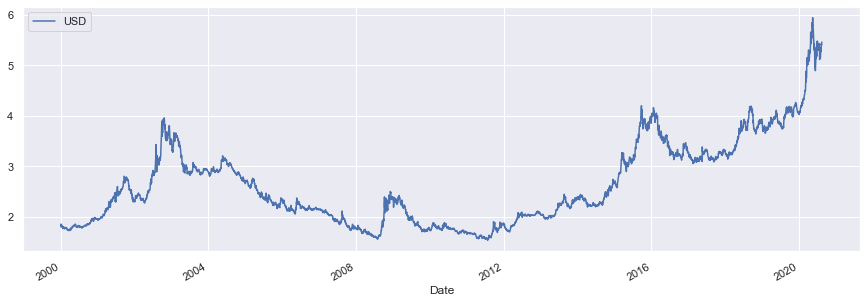

In [4]:
#Visualização do gráfico das cotações
dolar.rename(columns={"Value": "USD"}, inplace=True)
dolar.plot()

In [6]:
#Padronização dos retornos
dolar_m = dolar_ret.values.mean()
dolar_dp = dolar_ret.values.std()
dolar_ret_p = (dolar_ret - dolar_m)/dolar_dp
dolar_ret_p

,USD
Date,
2000-01-04,1.839088
2000-01-05,1.142558
2000-01-06,-0.487674
2000-01-07,-1.038881
2000-01-10,-0.705568
...,...
2020-08-06,1.289107
2020-08-07,1.512201
2020-08-10,-0.586301


In [7]:
#Aplicação do Modelo GARCH(1,1) aos dados e visualização dos resultados
garch_model = arch_model(dolar_ret_p, p=1, q=1, vol='GARCH', dist='Normal')
resultados = garch_model.fit(disp='off')
print(resultados.summary())

                     Constant Mean - GARCH Model Results                      
Dep. Variable:                    USD   R-squared:                      -0.001
Mean Model:             Constant Mean   Adj. R-squared:                 -0.001
Vol Model:                      GARCH   Log-Likelihood:               -6324.03
Distribution:                  Normal   AIC:                           12656.1
Method:            Maximum Likelihood   BIC:                           12682.3
                                        No. Observations:                 5177
Date:                Thu, Aug 13 2020   Df Residuals:                     5173
Time:                        09:34:11   Df Model:                            4
                                  Mean Model                                  
                 coef    std err          t      P>|t|        95.0% Conf. Int.
------------------------------------------------------------------------------
mu            -0.0321  1.139e-02     -2.820  4.809e-

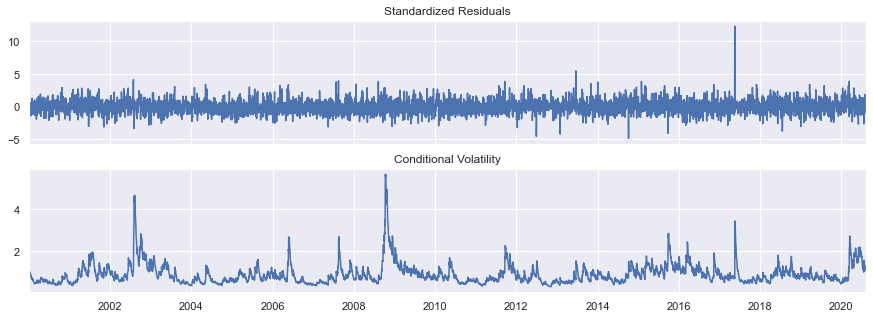

In [8]:
#Visualização dos gráfico dos resíduos padronizados e da volatilidade condicional 
g_resultados= resultados.plot()

In [9]:
#Previsão da volatilidade
resultados_forecast = resultados.forecast(horizon=5)
print(resultados_forecast.variance[-1:])

                 h.1       h.2       h.3       h.4       h.5
Date                                                        
2020-08-12  1.166545  1.177138  1.187707  1.198253  1.208775


Cada coluna “h.n” da saída da previsão corresponde a n d períodos a frente, neste caso n dias a frente. A saída é alinhada para que a coluna “Date” represente os dados finais usados para gerar a previsão, de modo que “h.1” na linha “2020-05-29” seja a previsão da volatilidade condicional esperada de um dia à frente, feita usando dados até 29 de meio de 2020.

O gráfico hedgehog a seguir mostra os métodos de previsão ao longo do período analisado.
As linhas laranja indicam as previsões em diferentes intervalos de tempo.

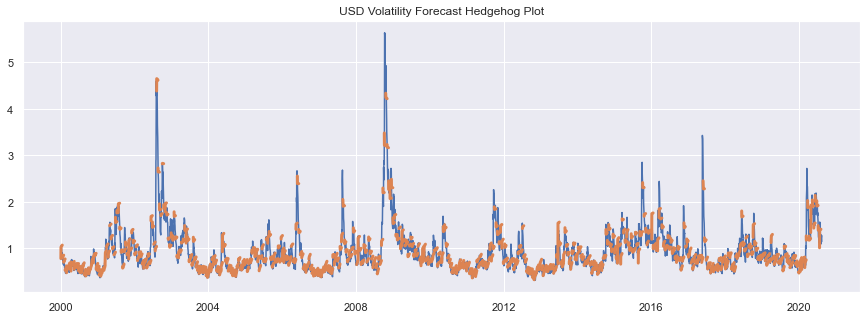

In [10]:
#Visualização do gráfico hedgehog
g_previsões = resultados.hedgehog_plot()